In [15]:
import matplotlib.pyplot as plt
import numpy
import csv
from scipy.special import gamma, factorial
from scipy.fftpack import dct
from scipy.special import huber

In [16]:
with open('FinalData.csv', newline = '') as f:
    reader = csv.reader(f)
    data = list(csv.reader(f));
    data = data[0:19]
    dataResult = numpy.array(data).astype("float")
    SampleData = data[0:15]
    SampledData = list(SampleData)
    SampledDataResult = numpy.array(SampledData).astype("float")

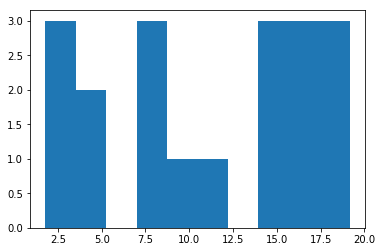

In [17]:
plt.hist(dataResult);
#original

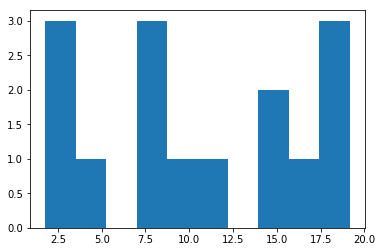

In [18]:
plt.hist(SampledDataResult);
#80 percent data

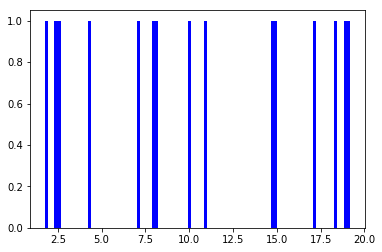

In [20]:
num_bins = 100
n, bins, patches1 = plt.hist( SampledDataResult, num_bins, facecolor='blue', alpha=1)

In [21]:
Counts = n;
ColCounts = len(n);
RowCounts = numpy.count_nonzero(Counts)
patterns = numpy.zeros((RowCounts,ColCounts))
index = numpy.nonzero(Counts)[0]

In [22]:
for ii in range(RowCounts):
    patterns[ii, index[ii]] = 1;
    
measurements = numpy.matmul(patterns, Counts )

In [23]:
x = numpy.ones([ColCounts])

In [24]:
from scipy.optimize import minimize

def NormApprox(a, x):
    Norm = 0;
    for ii in range(len(x)):
        Norm += (1/a)*(numpy.log(1 + numpy.exp(-a*x[ii])) + numpy.log(1 + numpy.exp(a*x[ii])))
    return Norm
    
def PossLikelihood(x, patt, Measure):
        lumbda = 1.5;
        a = 200;
        ax = numpy.sum(numpy.matmul(patterns, x));
        Mlog = numpy.sum(numpy.multiply(measurements, numpy.log(numpy.matmul(patterns, x))));
        #fac = numpy.sum(numpy.log(numpy.multiply(measurements, gamma(measurements))))
        fac = numpy.sum(numpy.log(factorial(measurements)))
        #norm1 = lumbda* (numpy.linalg.norm(dct(x + 10**-6, norm = 'ortho'),1) )
        norm1 = lumbda * NormApprox(a, x)
        Objective = ax - Mlog + fac + norm1
        return Objective

In [25]:
result = minimize(PossLikelihood, x, args=(patterns,measurements))

In [26]:
result

      fun: 29.62812363333041
 hess_inv: array([[ 9.39948397e-01, -6.45870159e-06, -6.45870159e-06, ...,
        -6.45870159e-06, -6.42806955e-02, -6.42806955e-02],
       [-6.45870159e-06,  9.83161416e-01, -1.68385843e-02, ...,
        -1.68385843e-02, -5.46151790e-06, -5.46151790e-06],
       [-6.45870159e-06, -1.68385843e-02,  9.83161416e-01, ...,
        -1.68385843e-02, -5.46151790e-06, -5.46151790e-06],
       ...,
       [-6.45870159e-06, -1.68385843e-02, -1.68385843e-02, ...,
         9.83161416e-01, -5.46151790e-06, -5.46151790e-06],
       [-6.42806955e-02, -5.46151790e-06, -5.46151790e-06, ...,
        -5.46151790e-06,  9.27163560e-01, -7.28364399e-02],
       [-6.42806955e-02, -5.46151790e-06, -5.46151790e-06, ...,
        -5.46151790e-06, -7.28364399e-02,  9.27163560e-01]])
      jac: array([ 9.53674316e-07,  0.00000000e+00,  0.00000000e+00,  9.53674316e-07,
        9.53674316e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  

In [ ]:
#x1 =numpy.ones([len(x)])
#minimize(PossLikelihood, x1,   method ='L-BFGS-B', args=(patterns, measurements))

In [ ]:
# x1 =numpy.ones([len(x)])
# bounds = numpy.zeros([len(x1),2])
# bounds[:,1]  = 1000
# #minimize(PossLikelihood(x1, patterns, measurements) , x1,  method = 'CG')

# result = minimize(PossLikelihood, x1, args=(patterns,measurements))

In [ ]:
norm1 = (numpy.linalg.norm(dct(x, norm = 'ortho'),1) )

In [ ]:
#norm1 = lumbda * numpy.sum(dct(x, norm = 'ortho'));
        #norm1 = lumbda* ( (numpy.linalg.norm(dct(x, norm = 'ortho'),1) ) / (numpy.linalg.norm(dct(x, norm = 'ortho'),2) )  )

In [ ]:
numpy.sum(dct(x, norm = 'ortho'))

In [ ]:

from scipy.special import huber

In [ ]:
abc = ([0,-1,2,-3,1,-2,3])
abclength = len(abc)

In [ ]:
abc

In [ ]:
(1/a)*(numpy.log(1 + exp(-a*x)) + numpy.log(1 + exp(a*x)))

In [ ]:
def NormApprox(a, x):
    Norm = 0;
    for ii in range(len(x)):
        Norm += (1/a)*(numpy.log(1 + numpy.exp(-a*x[ii])) + numpy.log(1 + numpy.exp(a*x[ii])))
    return Norm
    

In [12]:
xx = 1;
a = 1000;
(1/a)*(numpy.log(1 + numpy.exp(-a*xx)) + numpy.log(1 + numpy.exp(a*xx)))

inf

In [13]:
numpy.log(1 + numpy.exp(-a*xx))

0.0

In [14]:
numpy.log(1 + numpy.exp(-a*xx))

0.0

In [ ]:
NormApprox(a, abc)

In [ ]:
12.0069314718056 - 12.0

In [ ]:
numpy.linalg.norm(x,1)

In [ ]:
NormApprox(200, x)

In [ ]:
x